# Assignment 6.3

Brandon Sams

11Oct2020

Load the ResNet50 model. Perform image classification on five to ten images of your choice. They can be personal images or publically available images. Include the images in dsc650/assignments/assignment06/images/. Save the predictions dsc650/assignments/assignment06/results/predictions/resnet50 directory. If you are using JupyterHub, you can include those plots in your Jupyter notebook.

In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

model = ResNet50(weights='imagenet')

def process_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return(x)

def predict_image(processed_image):
    preds = model.predict(processed_image)
    prediction = decode_predictions(preds, top=1)[0][0]
    description = prediction[1]
    probability = prediction[2]
    return(description,probability)

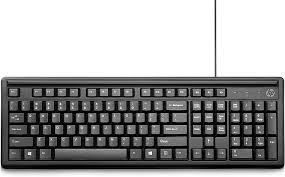

Filename: keyboard.jpg
Description: computer_keyboard
Probability: 0.7089291214942932
-----------------------------


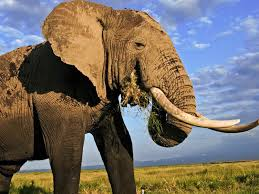

Filename: elephant.jpg
Description: African_elephant
Probability: 0.62835693359375
-----------------------------


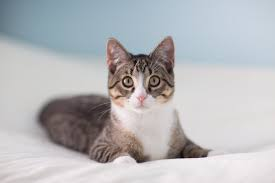

Filename: cat.jpg
Description: tabby
Probability: 0.38291242718696594
-----------------------------


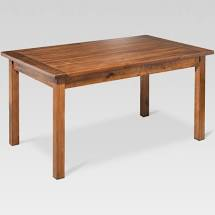

Filename: table.jpg
Description: desk
Probability: 0.39174094796180725
-----------------------------


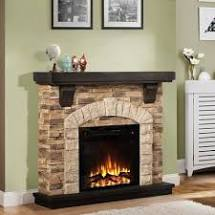

Filename: fireplace.jpg
Description: stove
Probability: 0.6792985796928406
-----------------------------


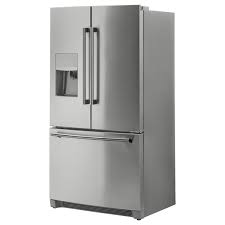

Filename: refrigerator.jpg
Description: refrigerator
Probability: 0.9945111274719238
-----------------------------


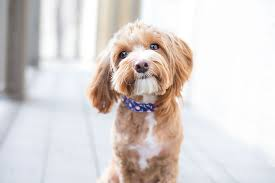

Filename: dog.jpg
Description: cocker_spaniel
Probability: 0.5130533576011658
-----------------------------


In [17]:
import os
import pandas as pd
from IPython.display import Image

directory = './6.3 Images/'

for filename in os.listdir(directory):
    img = process_image(f'{directory}{filename}')
    (description,probability) = predict_image(img)
    Image(filename=f'{directory}{filename}') 
    print(f'Filename: {filename}\nDescription: {description}\nProbability: {probability}\n-----------------------------')